# Project week 3


This week you'll be implementing your own block matching algorithm for stereo depth reconstruction.

Implement a function that takes two equal size images and calculates the sum of absolute differences. The two equal-sized images are nose_left.png (used as the template) and nose_right.png.

In [95]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.gray()

<Figure size 640x480 with 0 Axes>

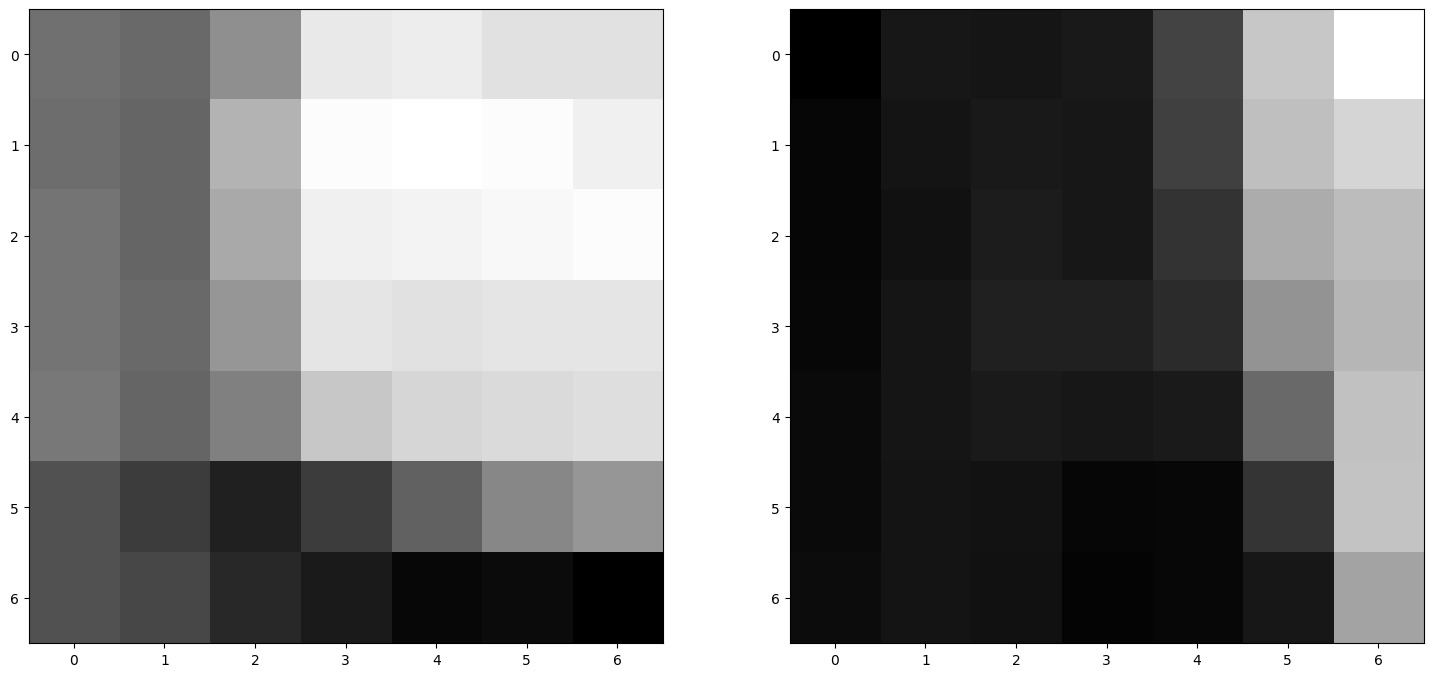

In [96]:
img = cv2.imread("nose_left.png")
img2 = cv2.imread("nose_right.png")


img_left = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_right = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_RGB2GRAY)

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18,18))
ax_left.imshow(gray_left)
ax_right.imshow(gray_right)

In [97]:
# Sum of absolute differences

def sad (img1, img2):
   
   return np.sum(np.abs(img1.astype(np.int32)- img2.astype(np.int32)))


nose1 = cv2.imread("nose1.png")
nose1_gray = cv2.cvtColor(nose1, cv2.COLOR_BGR2GRAY)
nose2 = cv2.imread("nose2.png")
nose2_gray = cv2.cvtColor(nose2, cv2.COLOR_BGR2GRAY)
nose3 = cv2.imread("nose3.png")
nose3_gray = cv2.cvtColor(nose3, cv2.COLOR_BGR2GRAY)

noses = [nose1_gray, nose2_gray, nose3_gray]

Using the function you just created, find which of the three images nose1.png, nose2.png, nose3.png gives the best match to nose_left.png?

In [98]:

for nose in noses:

    res = sad(gray_left, nose)
    print(f"sum of absolute error to {nose}: {res} ")

sum of absolute error to [[184 214 206 210 209 210 211]
 [159 211 207 211 210 212 210]
 [136 202 211 211 211 213 211]
 [120 180 217 210 212 214 212]
 [111 155 213 209 213 213 213]
 [ 80 149 193 215 212 212 214]
 [ 45 144 170 219 208 213 214]]: 1361 
sum of absolute error to [[201 193 201 225 230 225 223]
 [198 192 209 233 235 231 227]
 [194 193 211 231 233 234 234]
 [198 191 207 229 228 228 229]
 [199 192 203 223 225 227 227]
 [194 183 179 189 202 210 214]
 [191 183 180 171 171 170 173]]: 119 
sum of absolute error to [[183 192 193 201 203 198 189]
 [184 185 189 193 195 198 195]
 [180 180 181 186 185 186 183]
 [184 180 179 183 180 177 173]
 [185 182 179 179 171 164 151]
 [182 178 171 165 155 148 133]
 [169 167 161 160 152 148 125]]: 1490 


Since these images are rectified, we can approximately assume that a pixel found in row x in the left image also lives in row x in the right image. nose_span.png contains the entire row containing the nose of the sculpture. The height of the span is 7 - the same height as your template. Write a function that loops through the image from left to right and computes the correlation using your function from step 1 to find where in the span the nose is located.

Min distance: 119, coordinates on x axis: 132, 139, coordinates on y axis: 170, 190


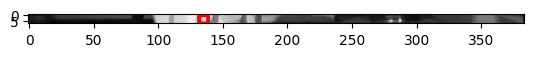

In [99]:
def find_item_in_span(span_pic, item_pic):
    """
    Take  a span and a picture of an item and return the left 
    coordinate for that item in a new image
    """
    
    block_width = item_pic.shape[1]
    min_dist = sad(span_pic[:, 1:1 + block_width], item_pic)
  
    for i in range(span_pic.shape[1] - block_width + 1):

        dist = sad(span_pic[:, i:i+block_width], item_pic)
        if dist < min_dist:
            min_dist = dist
            min_x = i
                

    return min_dist, min_x, block_width


def find_item_in_pic(pic, item_pic):
    """
    Take a picture and a picture of an item and return the coordinates 
    of the top left coordinate of the item in the picture 
    """
    
    block_width = item_pic.shape[1]
    block_height = item_pic.shape[0]
    min_dist = sad(pic[1:1 + block_height, 1:1 + block_width], item_pic)

    for j in range(pic.shape[0] - block_height + 1):
        for i in range(pic.shape[1] - block_width + 1):

            dist = sad(pic[j: j+block_height, i:i+block_width], item_pic)
            if dist < min_dist:
                min_dist = dist
                min_x = i
                min_y = j

    return min_dist, min_x, min_y, block_width, block_height


nose_span = cv2.imread("nose_span.png")
nose_span_gray = cv2.cvtColor(nose_span, cv2.COLOR_BGR2GRAY)

min_dist, min_x, block_width = find_item_in_span(nose_span_gray, gray_left)
print(f"Min distance: {min_dist}, coordinates on x axis: {min_x}, {min_x+block_width}, coordinates on y axis: {min_y}, {min_y+block_height}")

output = nose_span.copy()
cv2.rectangle(output, (min_x, 1), (min_x + block_width, output.shape[0]), (255, 0, 0), 2 )

plt.imshow(output)




Write a template matching function that iteratively takes a 7x7 subpart (numpy calls this slicing) of tsukuba_left.png and uses your function from step 3 to apply it to the corresponding row in tsukuba_right.png and stores the lowest/best matching disparity value for that template. Continue until all possible templates for a row has been used before moving down to the next row in the image.

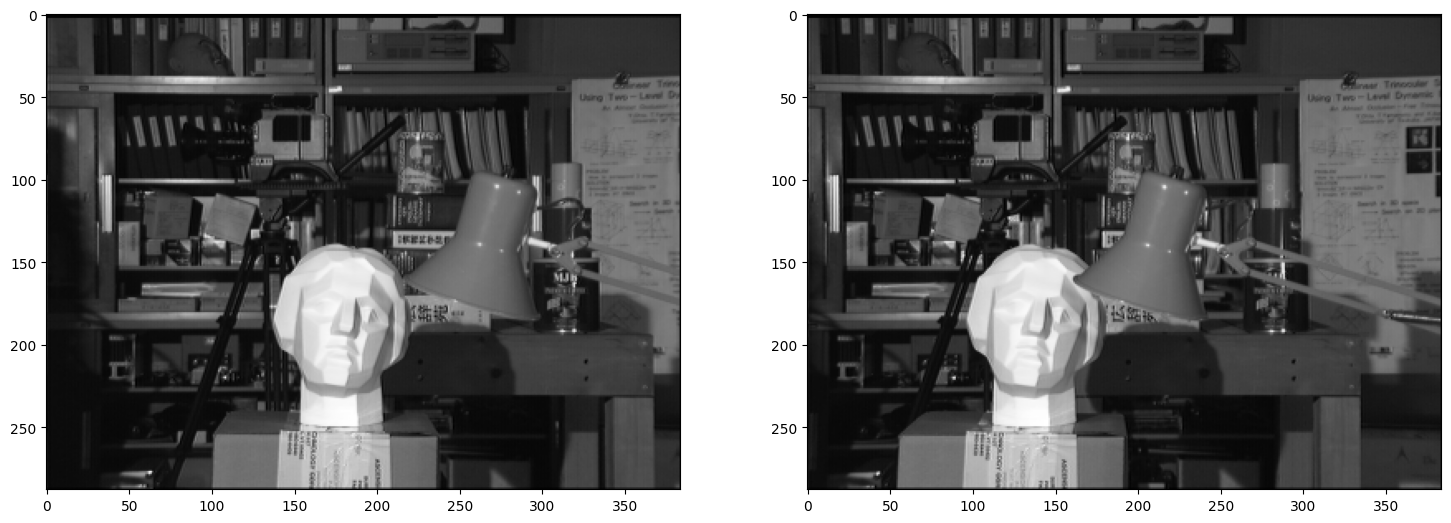

In [100]:
img = cv2.imread("tsukuba_left.png")
img2 = cv2.imread("tsukuba_right.png")



img_left = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_right = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray_left = cv2.cvtColor(img_left, cv2.COLOR_RGB2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_RGB2GRAY)

f, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18,18))
ax_left.imshow(gray_left)
ax_right.imshow(gray_right)

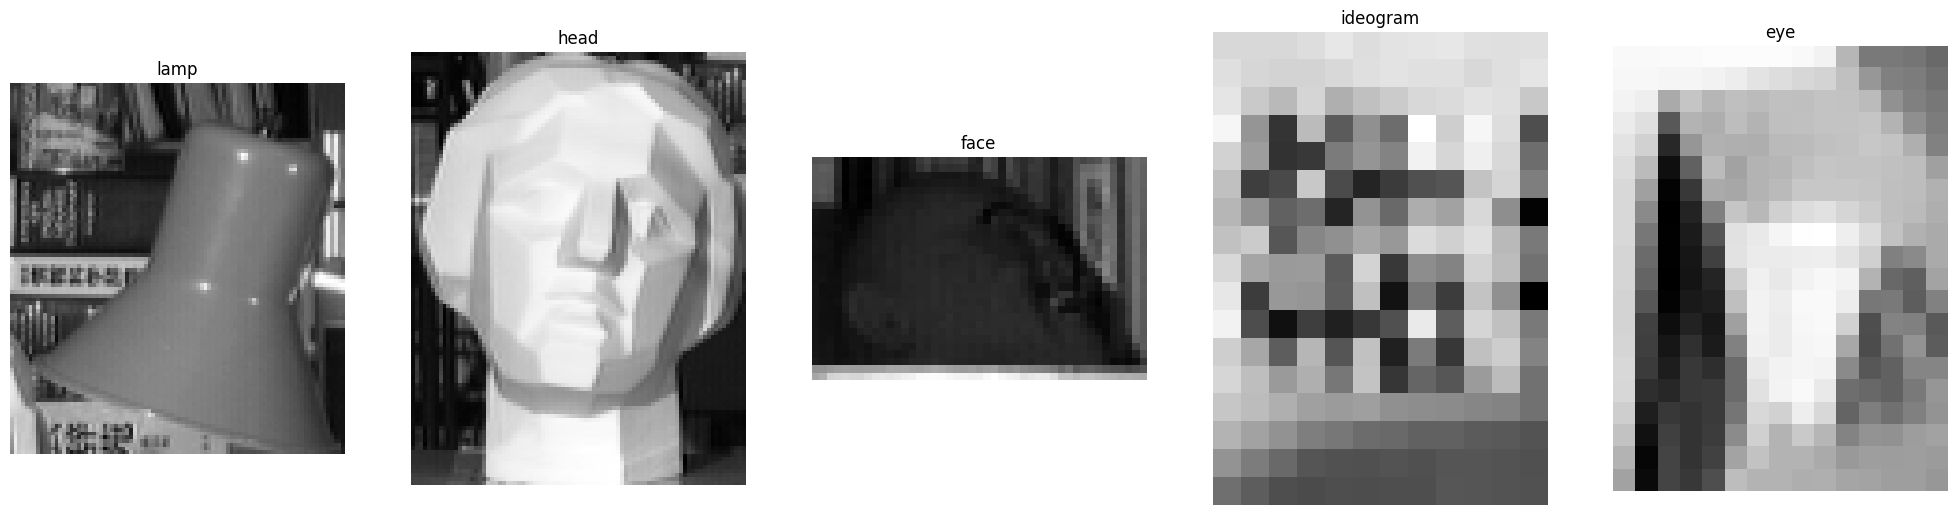

In [101]:
# Took some elements from left picture, to track them in the right one

lamp = gray_left[85:185, 210:300]
head = gray_left[140:250, 135:220]
face = gray_left[10:40, 70:115]
ideogram = gray_left[174:191, 224:236]
eye = gray_left[170:190, 185:200]


items = [lamp, head, face, ideogram, eye]

fig, axes = plt.subplots(1, 5, figsize=(25, 10))
titles = ["lamp", "head", "face", "ideogram", "eye"]
for ax, im, title in zip(axes, items, titles):
    ax.imshow(im, cmap='gray' if len(im.shape)==2 else None)
    ax.set_title(title)
    ax.axis('off')


item: 1
Min distance: 239912, coordinates on x axis: 154, 244, coordinates on y axis: 85, 185
item: 2
Min distance: 119589, coordinates on x axis: 94, 179, coordinates on y axis: 140, 250
item: 3
Min distance: 5321, coordinates on x axis: 51, 96, coordinates on y axis: 10, 40
item: 4
Min distance: 4348, coordinates on x axis: 193, 205, coordinates on y axis: 174, 191
item: 5
Min distance: 2271, coordinates on x axis: 143, 158, coordinates on y axis: 170, 190


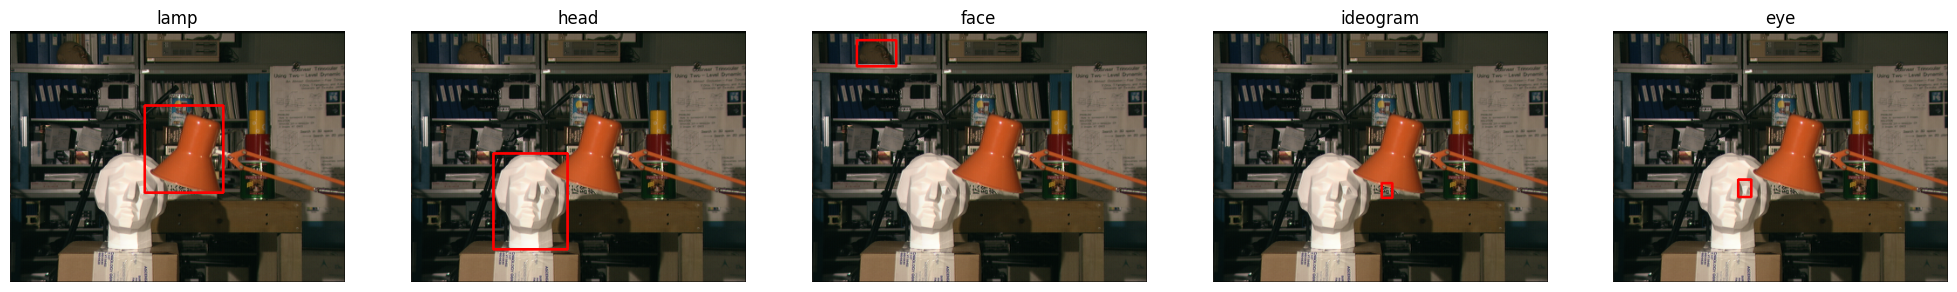

In [102]:
# Apply the method find item in pic to find all the items and then display the images
outputs = []
i = 1
for item in items:
    print(f"item: {i}")
    min_dist, min_x, min_y, block_width, block_height  = find_item_in_pic(gray_right, item)
    print(f"Min distance: {min_dist}, coordinates on x axis: {min_x}, {min_x+block_width}, coordinates on y axis: {min_y}, {min_y+block_height}")

    output= img_right.copy()
    cv2.rectangle(output, (min_x,min_y), (min_x + block_width, min_y + block_height), (255, 0, 0), 2 )
    outputs.append(output)
    i = i + 1




fig, axes = plt.subplots(1, 5, figsize=(25, 10))
titles = ["lamp", "head", "face", "ideogram", "eye"]
for ax, im, title in zip(axes, outputs, titles):
    ax.imshow(im, cmap='gray' if len(im.shape)==2 else None)
    ax.set_title(title)
    ax.axis('off')
    


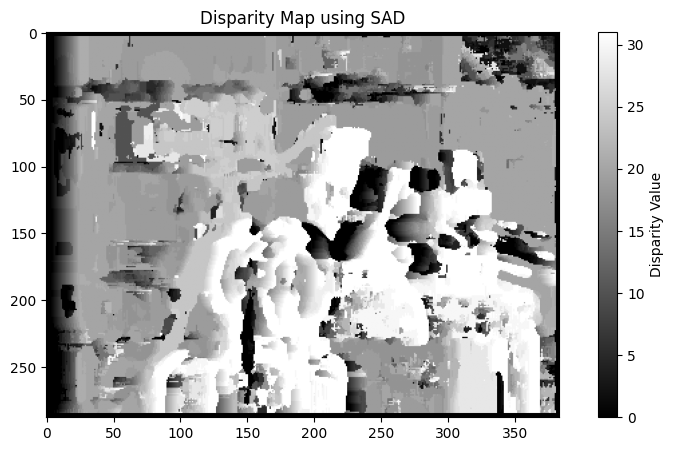

In [103]:
# Copied from Dragos

def stereo_block_match_sad(left_image, right_image, win=7, max_disparity=32):
    left_image = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
    right_image = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)
    H, W = left_image.shape

    window_radius = win // 2
    disparity = np.zeros((H, W), dtype=np.uint8)
    valid_start = window_radius
    valid_end_y = H - window_radius
    valid_end_x = W - window_radius

    for y in range(valid_start, valid_end_y):
        for x in range(valid_start, valid_end_x):
            best_offset = 0
            min_sad = float('inf')
            top_left_x = x - window_radius
            top_left_y = y - window_radius
            bottom_right_x = x + window_radius + 1
            bottom_right_y = y + window_radius + 1
            left_block = left_image[top_left_y:bottom_right_y, top_left_x:bottom_right_x]
            for offset in range(max_disparity):
                if x - window_radius - offset < 0:
                    continue
                right_block = right_image[top_left_y:bottom_right_y, top_left_x - offset:bottom_right_x - offset]
                sad_result = sad(left_block, right_block)
                if sad_result < min_sad:
                    min_sad = sad_result
                    best_offset = offset
            disparity[y, x] = best_offset

    return disparity


tsukuba_left = cv2.imread("tsukuba_left.png")
tsukuba_right  = cv2.imread("tsukuba_right.png")


disparity_map = stereo_block_match_sad(tsukuba_left, tsukuba_right, win=7, max_disparity=32)
plt.figure(figsize=(10,5))
plt.imshow(disparity_map, cmap='gray')
plt.title('Disparity Map using SAD')
plt.colorbar(label='Disparity Value')
plt.show()

In [104]:
def export_pointcloud(disparity_map, colors):
    ply_header = '''ply
    format ascii 1.0
    element vertex %(vert_num)d
    property float x
    property float y
    property float z
    property uchar red
    property uchar green
    property uchar blue
    end_header
    '''

    def write_ply(fn, verts, colors):
        verts = verts.reshape(-1, 3)
        colors = colors.reshape(-1, 3)
        verts = np.hstack([verts, colors])
        with open(fn, 'wb') as f:
            f.write((ply_header % dict(vert_num=len(verts))).encode('utf-8'))
            np.savetxt(f, verts, fmt='%f %f %f %d %d %d ')

    h, w = disparity_map.shape[:2]
    f = .8 * w  # guess for focal length. If you 3D reconstruction looks skewed in the viewing direction, try adjusting this parameter.
    Q = np.float32([[1, 0, 0, -0.5 * w],
                    [0, -1, 0, 0.5 * h],  # turn points 180 deg around x-axis,
                    [0, 0, 0, -f],  # so that y-axis looks up
                    [0, 0, 1, 0]])
    points = cv2.reprojectImageTo3D(disparity_map, Q)
    
    mask = disparity_map > disparity_map.min()
    out_points = points[mask]
    out_colors = colors[mask]
    out_fn = 'out.ply'
    write_ply('out.ply', out_points, out_colors)
    print(f'{out_fn} saved')

export_pointcloud(disparity_map=disparity_map, colors=tsukuba_left)

out.ply saved
